<h1 align="center">Volume 4: Timber Harvest.</h1>

    Spencer Halverson
    MATH 439
    2022-04-15

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [20]:
def RK4(x0,k,r,T,N=100,delta=0.001, maxiter=40):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y' = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of np.linspace(t0, tf, n).
    """
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2

    x = np.zeros(N+1)
    alpha = np.zeros(N+1)
    u = np.zeros(N+1)
    x[0] = x0

    # set `old` variables to compare (cannot equal originals at the beginning)
    oldx = np.ones(N+1)
    oldalpha = np.ones(N+1)
    oldu = np.ones(N+1)
    for iter in range(maxiter):

        # iteratively use RK4 to solve for x and alpha, then calculate u
        # use RK4 to solve for x (with u and alpha constant)
        for i in range(N):
            k1 = k*u[i]*x[i] # f(y, t)
            k2 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k1) # f(y + k1*h/2, t+h/2)
            k3 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k2) # f(y + k2*h/2, t+h/2)
            k4 = k*u[i+1]*(x[i]+h*k3) # f(y + k3*h, t+h)
            x[i+1] = x[i]+h/6*(k1+2*k2+2*k3+k4)
        
        # you will need to do something similar for (1.6) but solve for alpha ←-
        #   backwards in time and then use (1.7) to update u
        #
        # Now solve for alpha (alpha(tf) = 0)
        # (with u and x constant)
        alpha[-1] = 0 # this is fixed
        for i in range(N)[::-1]: # go backwards
            k1 = u[i]*(np.exp(-r*t[i]) - k*alpha[i]) - np.exp(-r*t[i]) # f(y, t)
            k2 = (u[i]+u[i+1])/2*(np.exp(-r*(t[i]+t[i+1])/2) - k*(alpha[i]+k1*h2)) - np.exp(-r*(t[i]+t[i+1])/2) # f(y + k1*h/2, t+h/2)
            k3 = (u[i]+u[i+1])/2*(np.exp(-r*(t[i]+t[i+1])/2) - k*(alpha[i]+k2*h2)) - np.exp(-r*(t[i]+t[i+1])/2) # f(y + k2*h/2, t+h/2)
            k4 = u[i+1]*(np.exp(-r*t[i+1]) - k*(alpha[i]+k3*h)) - np.exp(-r*t[i+1]) # f(y + k3*h, t+h)
            # alpha[i+1] = alpha[i]+h/6*(k1+2*k2+2*k3+k4)
            alpha[i] = alpha[i+1]-h/6*(k1+2*k2+2*k3+k4)

        # calculate phi at every step
        phi = x*(k*alpha - np.exp(-r*t))
        # if phi >= 0, then u = 1.
        # else u = 0.
        u = np.where(phi>= 0, 1., 0.)
        

        # use the following for your stopping criteria and stop once test > 0
        temp1 = delta*np.sum(np.abs(u)) - np.sum(np.abs(oldu - u))
        temp2 = delta*np.sum(np.abs(x)) - np.sum(np.abs(oldx - x))
        temp3 = delta*np.sum(np.abs(alpha)) - np.sum(np.abs(oldalpha - alpha))
        test = np.min([temp1, np.min([temp2, temp3])])

        # if all of our arrays are staying the same, end the algorithm
        if test > 0:
            break
        
        # keep track of older values so we can compare
        if iter%2 == 0:
            oldx = x.copy()
            oldalpha = alpha.copy()
            oldu = u.copy()
        
    return t, x, u, alpha, iter


# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


Number of iterations: 12


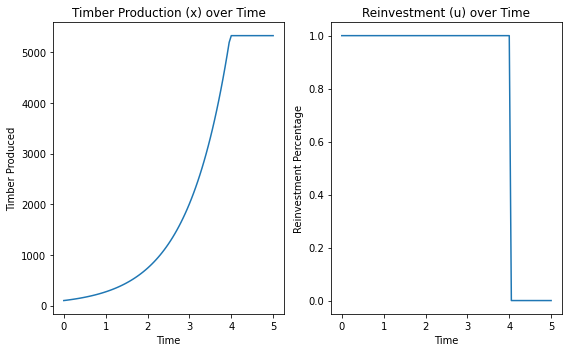

In [21]:
x0 = 100
k = 1
r= 0
T = 5

t,x,u,alpha,iter = RK4(x0, k, r, T)

print("Number of iterations:", iter)

# plot
fig = plt.figure(figsize=(8,5))

plt.subplot(121)
plt.plot(t, x)
plt.title("Timber Production (x) over Time")
plt.ylabel("Timber Produced")
plt.xlabel("Time")

plt.subplot(122)
plt.plot(t, u)
plt.title("Reinvestment (u) over Time")
plt.ylabel("Reinvestment Percentage")
plt.xlabel("Time")

plt.tight_layout()
plt.show()


# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

Number of iterations: 3


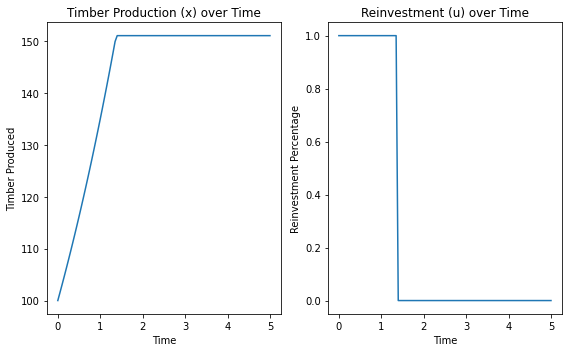

In [25]:
x0 = 100
k = 0.3
r= 0.05
T = 5

t,x,u,alpha,iter = RK4(x0, k, r, T)

print("Number of iterations:", iter)

# Plot
fig = plt.figure(figsize=(8,5))

plt.subplot(121)
plt.plot(t, x)
plt.title("Timber Production (x) over Time")
plt.ylabel("Timber Produced")
plt.xlabel("Time")

plt.subplot(122)
plt.plot(t, u)
plt.title("Reinvestment (u) over Time")
plt.ylabel("Reinvestment Percentage")
plt.xlabel("Time")

plt.tight_layout()
plt.show()


In [41]:
tol = 1e-5
print("At t = 1.35, u =", u[np.abs(t-1.35) < tol][0])
print("At t = 1.4, u =", u[np.abs(t-1.4) < tol][0])

print("This shows that the switching time is between 1.35 and 1.4")

At t = 1.35, u = 1.0
At t = 1.4, u = 0.0
This shows that the switching time is between 1.35 and 1.4


# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


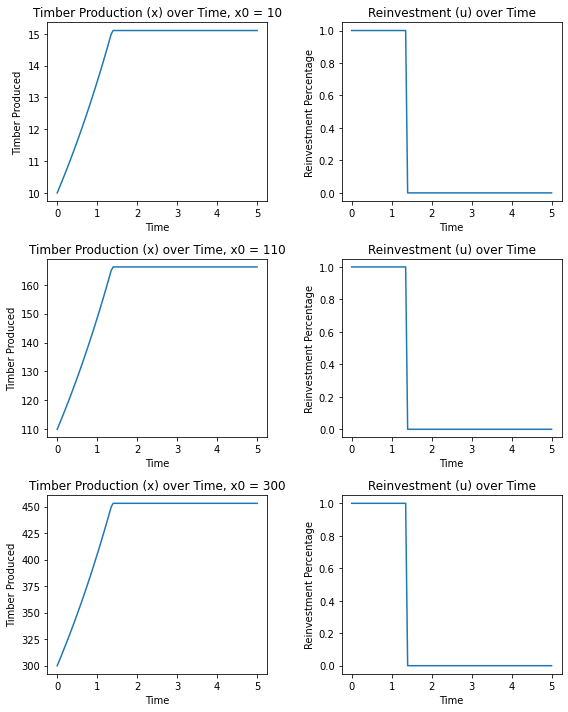

In [50]:
# plotting
fig = plt.figure(figsize=(8,10))

# generate first graphs
x0 = 10
k = 0.3
r= 0.05
T = 5

t,x,u,alpha,iter = RK4(x0, k, r, T)


plt.subplot(321)
plt.plot(t, x)
plt.title("Timber Production (x) over Time, x0 = {}".format(x0))
plt.ylabel("Timber Produced")
plt.xlabel("Time")

plt.subplot(322)
plt.plot(t, u)
plt.title("Reinvestment (u) over Time")
plt.ylabel("Reinvestment Percentage")
plt.xlabel("Time")

# generate next graphs
x0 = 110
k = 0.3
r= 0.05
T = 5

t,x,u,alpha,iter = RK4(x0, k, r, T)


plt.subplot(323)
plt.plot(t, x)
plt.title("Timber Production (x) over Time, x0 = {}".format(x0))
plt.ylabel("Timber Produced")
plt.xlabel("Time")

plt.subplot(324)
plt.plot(t, u)
plt.title("Reinvestment (u) over Time")
plt.ylabel("Reinvestment Percentage")
plt.xlabel("Time")

# generate final graphs
x0 = 300
k = 0.3
r= 0.05
T = 5

t,x,u,alpha,iter = RK4(x0, k, r, T)


plt.subplot(325)
plt.plot(t, x)
plt.title("Timber Production (x) over Time, x0 = {}".format(x0))
plt.ylabel("Timber Produced")
plt.xlabel("Time")

plt.subplot(326)
plt.plot(t, u)
plt.title("Reinvestment (u) over Time")
plt.ylabel("Reinvestment Percentage")
plt.xlabel("Time")


plt.tight_layout()
plt.show()


The optimal controls are the same every time, given r, k and T.